# Airline Review

#### Kali ini kita akan menganalisis bagaimana performa airline berdasarkan review customernya. Dataset yang didapatkan diambil dari kaggle.  Berikut adalah beberapa keterangan mengenai kolom-kolomnya.

1. Airline Name = merupakan nama perusahan airlane tersebut
2. Overal rating = nilai keselurhan yang diberikan oleh penumpang dengan skala 1-10
3. review_title = judul review yang diberikan oleh customer kepada airline
4. review date = tanggal dilakukan review
5. review = review yang diberikan oleh customer untuk airline
6. aircraft = kode penerbangan yang direview
7. type_of_traveller = tipe traveler reviewer
8. seat_type = tipe kursi reviewer
9. route = rute penerbangan reviewer
10. date flown = tnaggal penerbangan
11. seat comfort = nilai yang diberikan untuk kenyamanan kursi
12. Cabin Staff Service  = nilai yang diberikan untuk pelayanan staf kabin
13. Food & Beverages = nilai yang diberikan untuk makanan
14. Ground Service = nilai yang diberikan untuk pelayanan ground
15. Inflight Entertainment = nilai yang diberikan untuk hiburan ketika penerbangan
16. Wifi & Connectivity = nilai yang diberikan untuk wifi
17. Recommended = Apakah penerbangan tersebut direkomendasikan atau tidak

### Import dan Load dataset

In [1]:
# import library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# load dataset airline review
df = pd.read_csv('Airline_review.csv')
df.head(2)

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no


### Data Cleansing 

In [3]:
# Cek info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

In [4]:
#Drop column yang tidak terpakai
df.drop(columns=['Unnamed: 0'],inplace=True,axis=1)

In [5]:
#Cek unique value pada kolom overal_rating
df['Overall_Rating'].unique()

array(['9', '1', '8', '2', '3', '5', '6', '7', '4', 'n'], dtype=object)

In [6]:
#Mengganti nilai n dengan null
df['Overall_Rating'] = df['Overall_Rating'].replace({'n':np.nan})
#Merubah tipe data overal_rating dengan float
df['Overall_Rating'] = df['Overall_Rating'].astype(float)
#mengubah tipe data tanggal pada kolom review date dan date flown
df['Review Date'] = pd.to_datetime(df['Review Date'])
df['Date Flown'] = pd.to_datetime(df['Date Flown'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Airline Name            23171 non-null  object        
 1   Overall_Rating          22329 non-null  float64       
 2   Review_Title            23171 non-null  object        
 3   Review Date             23171 non-null  datetime64[ns]
 4   Verified                23171 non-null  bool          
 5   Review                  23171 non-null  object        
 6   Aircraft                7129 non-null   object        
 7   Type Of Traveller       19433 non-null  object        
 8   Seat Type               22075 non-null  object        
 9   Route                   19343 non-null  object        
 10  Date Flown              19417 non-null  datetime64[ns]
 11  Seat Comfort            19016 non-null  float64       
 12  Cabin Staff Service     18911 non-null  float6

In [8]:
df.head(5)

,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,AB Aviation,9.0,"""pretty decent airline""",2019-11-11,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,2019-11-01,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,AB Aviation,1.0,"""Not a good airline""",2019-06-25,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,2019-06-01,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,AB Aviation,1.0,"""flight was fortunately short""",2019-06-25,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,2019-06-01,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,Adria Airways,1.0,"""I will never fly again with Adria""",2019-09-28,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,2019-09-01,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,Adria Airways,1.0,"""it ruined our last days of holidays""",2019-09-24,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,2019-09-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


### Handling missing value

In [9]:
((df.isnull().sum())/23171 )*100

Airline Name               0.000000
Overall_Rating             3.633853
Review_Title               0.000000
Review Date                0.000000
Verified                   0.000000
Review                     0.000000
Aircraft                  69.233093
Type Of Traveller         16.132234
Seat Type                  4.730050
Route                     16.520651
Date Flown                16.201286
Seat Comfort              17.931898
Cabin Staff Service       18.385050
Food & Beverages          37.421777
Ground Service            20.685339
Inflight Entertainment    53.264857
Wifi & Connectivity       74.450822
Value For Money            4.600578
Recommended                0.000000
dtype: float64

#### Mayoritas kolom memiliki missing value lebih dari 5% datanya seperti kolom aircraft, type of traveller, route dll. Sehingga kolom-kolom ini perlu diisi missing valuenya agar tida terjadi kesalahan pada saat analisis data. sementara ada beberapa kolom yang memiliki missng  value dibawah 5 % seperti seat type, overal rating dan value for money. Mising value yang kecil ini tidak akan mempengaruhi proses analisis data sehingga bisa kita hapus. 

In [10]:
# Drop null value pada kolom yang memiliki missing value kuranf dair 5%
df.dropna(subset=['Overall_Rating','Seat Type','Value For Money'],inplace=True)

#### Handling missing value kolom AIrcraft

Pengisian missing value pada kolom aircraft dilakukan dengan dua cara.
1. Isi missing value dengan nilai aircraft pada baris lain yang tidak null dengan syarat memiliki nilai kolom airline name dan route yang sama.
2. Kemudian untuk missing value yang tidak ter-backup oleh cara pertama maka diisi dengan menambahkan nilai modus kolom tersebut berdasarkan kolom airline namenya. 

In [11]:
# Jumlah missing value sebelum diproses
df['Aircraft'].isnull().sum()

14620

In [12]:
#Handling missing value dengan cara Pertama

#Identifikasi baris-baris dengan nilai kosong pada kolom 'Aircraft'
rows_with_nan = df[df['Aircraft'].isnull()]

#Cari baris dengan nilai yang sama pada kolom 'airline name' dan 'route'
for index, row in rows_with_nan.iterrows():
    brand_type_match = df[
        (df['Airline Name'] == row['Airline Name']) & (df['Route'] == row['Route']) & ~df['Aircraft'].isnull()
    ]
    if not brand_type_match.empty:
        #Isi nilai kosong pada kolom 'aircraft' dengan nilai yang sesuai
        df.at[index, 'Aircraft'] = brand_type_match['Aircraft'].iloc[0]
df['Aircraft'].isnull().sum()

12904

In [13]:
#Handling missing value dengan cara Kedua

# membuat fungsi untuk mencari nilai modus
def custom_mode(x):
    try:
        return x.mode().iloc[0]
    except IndexError:
        return None

# Fill missing values in 'Aircraft' column with a temporary value within each 'Airline Name' group
df['Aircraft'] = df.groupby('Airline Name')['Aircraft'].apply(lambda x: x.fillna('TEMP'))

# Now, replace the temporary value ('TEMP') with the mode for each 'Airline Name' group
df['Aircraft'] = df.groupby('Airline Name')['Aircraft'].transform(lambda x: x.replace('TEMP', custom_mode(x)))
df['Aircraft'].isnull().sum()

0

In [14]:
df[df['Airline Name']=='AB Aviation']

,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,AB Aviation,9.0,"""pretty decent airline""",2019-11-11,True,Moroni to Moheli. Turned out to be a pretty ...,E120,Solo Leisure,Economy Class,Moroni to Moheli,2019-11-01,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,AB Aviation,1.0,"""Not a good airline""",2019-06-25,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,2019-06-01,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,AB Aviation,1.0,"""flight was fortunately short""",2019-06-25,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,2019-06-01,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no


#### Handling missing value kolom route

Pengisian missing value pada kolom route dilakukan dengan dua cara.
1. Isi missing value dengan nilai route pada baris lain yang tidak null dengan syarat memiliki nilai kolom airline name dan aircraft yang sama.
2. Kemudian untuk missing value yang tidak ter-backup oleh cara pertama maka diisi dengan menambahkan nilai modus kolom tersebut berdasarkan kolom airline namenya. 

In [15]:
df['Route'].isnull().sum()

2412

In [16]:
#Handling missing value dengan cara Pertama

#Identifikasi baris-baris dengan nilai kosong pada kolom 'route'
rows_with_nan = df[df['Route'].isnull()]

#Cari baris dengan nilai yang sama pada kolom 'Airline Name' dan 'Aircraft'
for index, row in rows_with_nan.iterrows():
    brand_type_match = df[
        (df['Airline Name'] == row['Airline Name']) & (df['Aircraft'] == row['Aircraft']) & ~df['Route'].isnull()
    ]
    if not brand_type_match.empty:
        #Isi nilai kosong pada kolom 'route' dengan nilai yang sesuai
        df.at[index, 'Route'] = brand_type_match['Route'].iloc[0]
df['Route'].isnull().sum()

198

In [17]:
#Handling missing value dengan cara Kedua

# membuat fungsi untuk mencari nilai modus
def custom_mode(x):
    try:
        return x.mode().iloc[0]
    except IndexError:
        return None

# Fill missing values in 'Route' column with a temporary value within each 'Airline Name' group
df['Route'] = df.groupby('Airline Name')['Route'].apply(lambda x: x.fillna('TEMP'))

# Now, replace the temporary value with the mode for each 'Airline Name' group
df['Route'] = df.groupby('Airline Name')['Route'].transform(lambda x: x.replace('TEMP', custom_mode(x)))

df['Route'].isnull().sum()

0

#### Handling missing value Date_flown

Pengisian missing value pada kolom date_flown dilakukan dengan cara Isi missing value dengan nilai date_flown pada baris lain yang tidak null dengan syarat memiliki nilai kolom route dan aircraft yang sama.

In [18]:
#Identifikasi baris-baris dengan nilai kosong pada kolom 'date_flown'
rows_with_nan = df[df['Date Flown'].isnull()]

#Cari baris dengan nilai yang sama pada kolom 'Aircraft' dan 'Route'
for index, row in rows_with_nan.iterrows():
    brand_type_match = df[
        (df['Route'] == row['Route']) & (df['Aircraft'] == row['Aircraft']) & ~df['Date Flown'].isnull()
    ]
    if not brand_type_match.empty:
        #Isi nilai kosong pada kolom 'date_flown' dengan nilai yang sesuai
        df.at[index, 'Date Flown'] = brand_type_match['Date Flown'].iloc[0]
df['Date Flown'].isnull().sum()

202

Dikarenakan masih ada sedikit sisa missing value maka sisa missing value ini akan dibuang agar habis.

In [19]:
df.dropna(subset=['Date Flown'],inplace=True)
df['Date Flown'].isnull().sum()

0

#### Handling missing value categotical column
untuk mengisi missing value pada kolom sea comfort, cabin staf, food, ground services, inflight entertainment dan wifi & connectivity dilakukan dengan menambahkan nilai modus tiap kolom tersebut.

In [20]:
df['Type Of Traveller'] = df['Type Of Traveller'].fillna('Solo Leisure')
df['Seat Comfort'] = df['Seat Comfort'].fillna(df['Seat Comfort'].mode().iloc[0])
df['Cabin Staff Service'] = df['Cabin Staff Service'].fillna(df['Cabin Staff Service'].mode().iloc[0])
df['Food & Beverages'] = df['Food & Beverages'].fillna(df['Food & Beverages'].mode().iloc[0])
df['Ground Service'] = df['Ground Service'].fillna(df['Ground Service'].mode().iloc[0])
df['Inflight Entertainment'] = df['Inflight Entertainment'].fillna(df['Inflight Entertainment'].mode().iloc[0])
df['Wifi & Connectivity'] = df['Wifi & Connectivity'].fillna(df['Wifi & Connectivity'].mode().iloc[0])

#### Cek apakah masih ada missing value

In [21]:
((df.isnull().sum())/23171 )*100

Airline Name              0.0
Overall_Rating            0.0
Review_Title              0.0
Review Date               0.0
Verified                  0.0
Review                    0.0
Aircraft                  0.0
Type Of Traveller         0.0
Seat Type                 0.0
Route                     0.0
Date Flown                0.0
Seat Comfort              0.0
Cabin Staff Service       0.0
Food & Beverages          0.0
Ground Service            0.0
Inflight Entertainment    0.0
Wifi & Connectivity       0.0
Value For Money           0.0
Recommended               0.0
dtype: float64

In [22]:
df.head(3)

,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,AB Aviation,9.0,"""pretty decent airline""",2019-11-11,True,Moroni to Moheli. Turned out to be a pretty ...,E120,Solo Leisure,Economy Class,Moroni to Moheli,2019-11-01,4.0,5.0,4.0,4.0,1.0,1.0,3.0,yes
1,AB Aviation,1.0,"""Not a good airline""",2019-06-25,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,2019-06-01,2.0,2.0,1.0,1.0,1.0,1.0,2.0,no
2,AB Aviation,1.0,"""flight was fortunately short""",2019-06-25,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,2019-06-01,2.0,1.0,1.0,1.0,1.0,1.0,2.0,no


In [23]:
df.dtypes

Airline Name                      object
Overall_Rating                   float64
Review_Title                      object
Review Date               datetime64[ns]
Verified                            bool
Review                            object
Aircraft                          object
Type Of Traveller                 object
Seat Type                         object
Route                             object
Date Flown                datetime64[ns]
Seat Comfort                     float64
Cabin Staff Service              float64
Food & Beverages                 float64
Ground Service                   float64
Inflight Entertainment           float64
Wifi & Connectivity              float64
Value For Money                  float64
Recommended                       object
dtype: object

### Mengganti nilai yes pada kolom recomended menjadi 1 dan no menjadi 0

In [24]:
df['Recommended'] = df['Recommended'].replace({'yes':1,'no':0})

In [25]:
df.head()

,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,AB Aviation,9.0,"""pretty decent airline""",2019-11-11,True,Moroni to Moheli. Turned out to be a pretty ...,E120,Solo Leisure,Economy Class,Moroni to Moheli,2019-11-01,4.0,5.0,4.0,4.0,1.0,1.0,3.0,1
1,AB Aviation,1.0,"""Not a good airline""",2019-06-25,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,2019-06-01,2.0,2.0,1.0,1.0,1.0,1.0,2.0,0
2,AB Aviation,1.0,"""flight was fortunately short""",2019-06-25,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,2019-06-01,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0
3,Adria Airways,1.0,"""I will never fly again with Adria""",2019-09-28,False,Please do a favor yourself and do not fly wi...,TEMP,Solo Leisure,Economy Class,Frankfurt to Pristina,2019-09-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
4,Adria Airways,1.0,"""it ruined our last days of holidays""",2019-09-24,True,Do not book a flight with this airline! My fr...,TEMP,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,2019-09-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


## Analisis TOP 3 Airline Name

Pada tahap analisis ini, kita akan melihat 3 airline name terbaik dan terburuk berdasarkan penilaian pengguna.

In [26]:
# Membuat pivot tabel berdasarkan airline name.
top_airline = pd.pivot_table(df,index=['Airline Name'],
                                 aggfunc={
                                     'Overall_Rating':'mean',
                                     'Review_Title' :'count',
                                     'Seat Comfort' :'mean',
                                     'Cabin Staff Service' :'mean',
                                     'Food & Beverages' :'mean',
                                     'Ground Service' :'mean',
                                     'Wifi & Connectivity' :'mean',
                                     'Value For Money' :'mean',
                                     'Recommended' :'mean'
                                 }).reset_index()

# Mengganti nama kolom revoew_title dengan number of reviews
top_airline =top_airline.rename(columns={'Review_Title':'Number of Reviews'})
# Mengubah urutan kolom pivot table
top_airline = top_airline[['Airline Name', 'Number of Reviews', 'Overall_Rating','Seat Comfort',
                           'Cabin Staff Service','Food & Beverages','Ground Service','Wifi & Connectivity',
                           'Value For Money','Recommended']]
# Membulatkan nilai pada pivot table
top_airline = top_airline.round(1)
top_airline

,Airline Name,Number of Reviews,Overall_Rating,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,AB Aviation,3,3.7,2.7,2.7,2.0,2.0,1.0,2.3,0.3
1,ANA All Nippon Airways,100,3.8,4.2,4.5,3.9,4.1,2.0,4.1,0.8
2,ASKY Airlines,22,2.4,2.0,1.8,1.7,1.5,1.0,1.6,0.1
3,ATA Airlines,2,1.5,1.0,1.5,1.5,1.5,1.0,2.0,0.0
4,Adria Airways,70,4.9,2.9,2.9,2.0,2.1,1.1,2.9,0.6
...,...,...,...,...,...,...,...,...,...,...
462,euroAtlantic Airways,16,2.1,1.4,1.9,2.1,1.6,1.2,1.4,0.1
463,fastjet,33,2.9,2.7,2.6,1.5,2.2,1.0,2.3,0.3
464,flyadeal,19,1.9,1.5,1.5,1.3,1.3,1.0,1.7,0.1
465,flybe,4,1.2,2.8,3.5,2.8,3.5,1.0,3.2,0.5


### Airline name terbaik

Untuk memlihat 3 airline terbaik dapat dilakukan dengan melihat jumlah reviews dan overall_ratingnya. Semakin banyak jumlah review dan semakin tinggi overal ratingnya maka semakin baik pula airline name tersebut. Sementara kebalaikannya semakin banyak jumlah review dan semakin kecil overal ratingnya maka menandakan airline name tersebut kinerjanya buruk.

In [27]:
# Mencari 3 airline name yang memiliki penilaian tertinggi
top_3_airline = top_airline[top_airline['Number of Reviews']>top_airline['Number of Reviews'].mean()].sort_values('Overall_Rating',ascending=False).head(3)
top_3_airline

,Airline Name,Number of Reviews,Overall_Rating,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Wifi & Connectivity,Value For Money,Recommended
137,China Southern Airlines,100,6.3,4.4,4.7,4.2,4.9,1.7,4.5,1.0
129,Cathay Dragon,62,6.1,3.9,4.1,3.6,3.9,1.3,3.8,0.8
322,QantasLink,99,6.0,2.3,2.5,2.1,2.4,1.0,2.9,0.8


3 airline name terbaik menurut user adalah China Southern Airlines,Cathay Dragon dan QantasLink. ketiga airline ini memiliki nilai overal rating diatas nilai 6 dengan jumlah review lebih dari rata-rata review tiap airline. Ketiga airline ini memiliki rekomendasi diatas 0.8. hal ini menandakan bahwa ketiga airline ini sangat direkomendasikan oleh para pengguna.

In [28]:
bottom_3_airline = top_airline[top_airline['Number of Reviews']>top_airline['Number of Reviews'].mean()].sort_values('Overall_Rating').head(3)
bottom_3_airline

,Airline Name,Number of Reviews,Overall_Rating,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Wifi & Connectivity,Value For Money,Recommended
185,Frontier Airlines,100,1.2,1.2,1.4,1.0,1.2,1.0,1.2,0.0
437,Viva Air,70,1.2,1.3,1.4,1.1,1.0,1.0,1.2,0.0
439,VivaColombia,48,1.2,1.5,1.4,1.1,1.2,1.0,1.5,0.1


3 airiline terburuk menurut user adalah Frontier Airlines,Viva Air, dan VivaColombia dengan nilai overal rating sama 1.2 dengan jumlah review lebih dari rata-rata review tiap airline. Airline ini sama sekali tidak direkomendasikan oleh user bahkan airline dengan nama frontier airline memiliki jumlah review sebanyak 100 dan semuanya memberi nilai 0 pada kolom recomded. 

### Korelasi antar kolom

Untuk melihat peranan tiap kolom dalam mempengaruhi nilai overal rating yang diberikan dapat dilakukan dengan cara mencari  korelasi tiap kolom-kolom tersebut. nilai korelasi sendiri dapat dicari dengan beberapa cara salah satunya yaitu dengan menggunakan library yang sudah ada pada pandas yaitu corelation matrix. 

In [187]:
#Membuat corellation matrix dengan pandas
correlation_matrix = top_airline.corr()

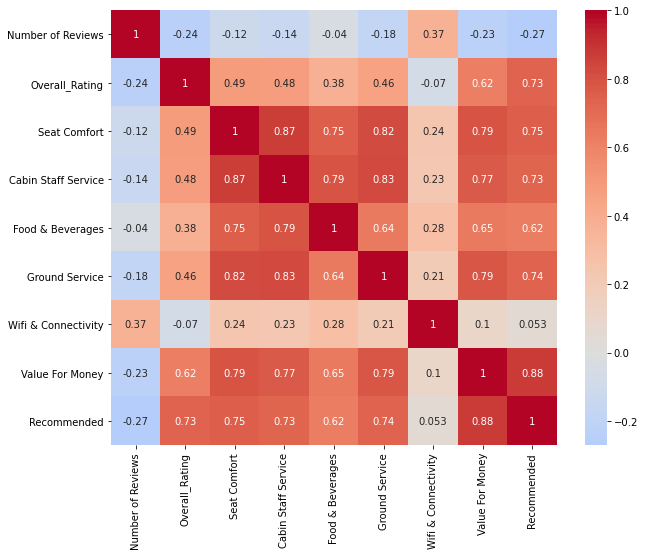

In [188]:
# Memvisualisasikan korelasi matrix antar kolom
plt.figure(figsize=(10, 8))

# Membuat heatmap korelasi menggunakan seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Menampilkan gambar
plt.show()

corelation matriks menggambarkan seberapa kuat hubungan antara dua kolom. Hubungan antar kolom ini digambarkan dengan nilai -1 sampai +1. Nilai +1 pada Corellation matriks menandakan hubungan antar kolom tersebut searah dan sangat kuat. nilai -1 pada correlation matriks menandakan hubungan antar kolom tersebut sangat kua tetapi berlainan arah. sementara jika hubungan antar kolom tidak kuat atau bahkan tidak memiliki hubungan maka nilai corellation matriksnya adalah 0.

Corellation matriks diatas merupakan corellation matriks dari 3 airline teratas. dapat dilihat bahwa nilai overal rating sangat mempengeruhi nilai rekomendasi dengan nilai korelasi sebesar 0.73 dan hubungan kedua kolom tersebut adalah searah.
Sementara kolom jumlah reviews memiliki hubungan negatif dengan semua kolom. Hal ini menandakan bahwa jika kolom penilaian lain seperti overal rating, seat comfort dll memiliki nilai yang kecil (pelayanan buruk) maka user akan melakukan komplain dengan memberi reviews, sementara jika pelayanannya baik maka user tidak akan/ sedikit  memberikan reviews. 